In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from SimpleRegressions import *

In [2]:
df = pd.read_pickle('new_ak5.pkl')

In [3]:
df = df.sample(frac=1)
df_train,df_test = np.array_split(df,2)

simpleFeatures = ['jet_pt','jet_eta']

factorNames = ['jet_pt','jet_eta',
                 'jet_photon_frac',
                 'jet_electron_frac',
                 'jet_muon_frac',
                 'jet_neutHad_frac',
                 'jet_charHad_frac',
                 'jet_electron_mult',
                 'jet_muon_mult',
                 'jet_photon_mult',
                 'jet_neutHad_mult',
                 'jet_charHad_mult'
                ]

allFactors = ['jet_pt','jet_eta',
                 'jet_photon_frac',
                 'jet_electron_frac',
                 'jet_muon_frac',
                 'jet_neutHad_frac',
                 'jet_charHad_frac',
                 'jet_electron_mult',
                 'jet_muon_mult',
                 'jet_photon_mult',
                 'jet_neutHad_mult',
                 'jet_charHad_mult'
                ]

normalFactors = ['jet_eta',
                 'jet_photon_frac',
                 'jet_electron_frac',
                 'jet_muon_frac',
                 'jet_neutHad_frac',
                 'jet_charHad_frac',
                 'jet_electron_mult',
                 'jet_muon_mult',
                 'jet_photon_mult',
                 'jet_neutHad_mult',
                 'jet_charHad_mult'
                ]

In [4]:
scaleData = False
if( scaleData ):
    means = df_perjet.mean()
    rmss = df_perjet.std()

    for f in normalFactors:
        df_perjet[f] = map(lambda x : (x-means[f])/rmss[f],df_perjet[f])

rfr = random_forest_regression(factors=factorNames,regressor='jet_jes')
rfr.n_trees=50
rfr.max_depth=30
rfr.fit(df_train,verbose=True,append="_rfall")
rfr.test(df_test,verbose=True,append="_rfall")

rfr_pteta = random_forest_regression(factors=simpleFeatures,regressor='jet_jes')
rfr_pteta.n_tress=50
rfr_pteta.max_depth=20
rfr_pteta.fit(df_train,verbose=True,append="_rfpteta")
rfr_pteta.test(df_test,verbose=True,append="_rfpteta")

model = rfr.model

train:
RMSE: 0.0677414111922
test:
RMSE: 0.169713358599
train:
RMSE: 0.150446038483
test:
RMSE: 0.188922725555


In [5]:
df = pd.concat([df_test,df_train])
df.to_pickle('new_ak5_withRF.pkl')
print df_test.columns

Index([u'event', u'run', u'lumi', u'ak5pfcand_ijet', u'ak5pfcand_eta',
       u'ak5pfcand_phi', u'ak5pfcand_pt', u'ak5pfcand_charge', u'ak5pfcand_id',
       u'met', u'sumet', u'rho', u'pthat', u'mcweight', u'njet', u'jet_pt',
       u'jet_eta', u'jet_phi', u'jet_E', u'jet_area', u'jet_jes', u'chf',
       u'nhf', u'phf', u'elf', u'muf', u'hf_hf', u'hf_phf', u'hf_hm',
       u'hf_phm', u'chm', u'nhm', u'phm', u'elm', u'mum', u'beta', u'bstar',
       u'pfcand_centered_phi', u'pfcand_centered_eta', u'pfcand_riz',
       u'pfcand_riy', u'jet_image', u'photon_filter', u'electron_filter',
       u'muon_filter', u'charHad_filter', u'neutHad_filter',
       u'jet_photon_mult', u'jet_electron_mult', u'jet_muon_mult',
       u'jet_charHad_mult', u'jet_neutHad_mult', u'jet_photon_frac',
       u'jet_electron_frac', u'jet_muon_frac', u'jet_charHad_frac',
       u'jet_neutHad_frac', u'prediction_rfall', u'residual_rfall',
       u'prediction_rfpteta', u'residual_rfpteta'],
      dtype='object')


In [6]:
def residual_profile(indep_var,dep_var,c,low_bin,high_bin,nbins):
    print "plot_var:",indep_var
    print "low_bin:",low_bin
    print "high_bin:",high_bin
    print "nbins:",nbins
    df_test[indep_var+'_bins'] = pd.cut(df_test[indep_var],np.arange(low_bin,high_bin+0.00001,(high_bin-low_bin)/float(nbins)),labels=range(nbins))
    means = df_test.groupby([indep_var+'_bins']).mean()[dep_var].values
    counts = df_test.groupby([indep_var+'_bins']).count()[dep_var].values
    sqrt_counts = map(sqrt,counts)
    errs  = df_test.groupby([indep_var+'_bins']).std()[dep_var].values
    errs = errs/sqrt_counts
    bin_center=np.arange(low_bin,high_bin+0.00001,(high_bin-low_bin)/float(nbins))
    bin_center = bin_center[:-1]
    bin_center = map(lambda x : x+(high_bin-low_bin)/float(nbins)/2.,bin_center)
    plt.errorbar(x=bin_center,y=means,yerr=errs,fmt='o',color=c)
    plt.xlabel(indep_var)
    plt.ylabel("<residual>")
    plt.ylim(-0.05,0.05)

plot_var: jet_pt
low_bin: 10
high_bin: 1000
nbins: 90
plot_var: jet_pt
low_bin: 10
high_bin: 1000
nbins: 90


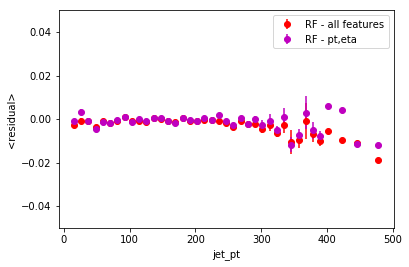

plot_var: jet_eta
low_bin: -5
high_bin: 5
nbins: 60
plot_var: jet_eta
low_bin: -5
high_bin: 5
nbins: 60


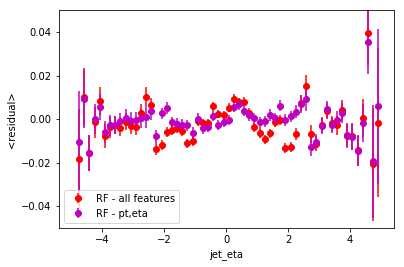

plot_var: jet_electron_frac
low_bin: 0
high_bin: 1.5
nbins: 50
plot_var: jet_electron_frac
low_bin: 0
high_bin: 1.5
nbins: 50


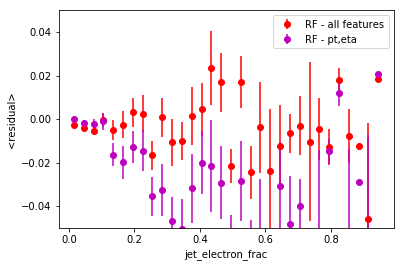

plot_var: jet_muon_frac
low_bin: 0
high_bin: 1.5
nbins: 50
plot_var: jet_muon_frac
low_bin: 0
high_bin: 1.5
nbins: 50


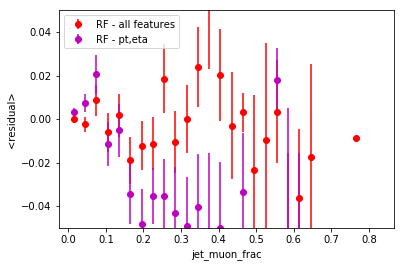

plot_var: jet_photon_frac
low_bin: 0
high_bin: 1.5
nbins: 50
plot_var: jet_photon_frac
low_bin: 0
high_bin: 1.5
nbins: 50


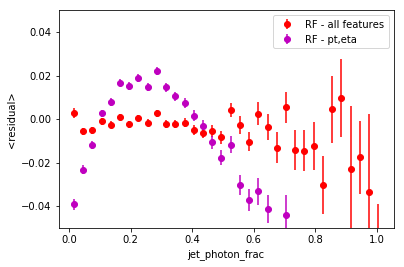

plot_var: jet_neutHad_frac
low_bin: 0
high_bin: 1.5
nbins: 50
plot_var: jet_neutHad_frac
low_bin: 0
high_bin: 1.5
nbins: 50


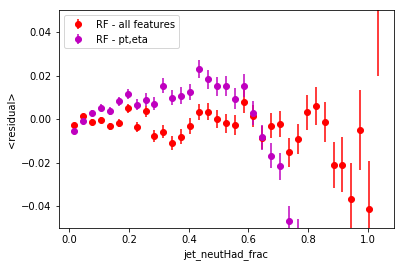

plot_var: jet_charHad_frac
low_bin: 0
high_bin: 1.5
nbins: 50
plot_var: jet_charHad_frac
low_bin: 0
high_bin: 1.5
nbins: 50


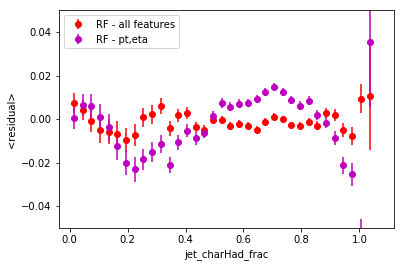

plot_var: jet_electron_mult
low_bin: 0
high_bin: 100
nbins: 100
plot_var: jet_electron_mult
low_bin: 0
high_bin: 100
nbins: 100


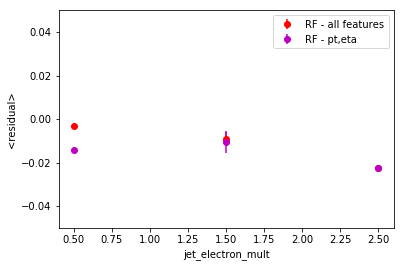

plot_var: jet_muon_mult
low_bin: 0
high_bin: 100
nbins: 100
plot_var: jet_muon_mult
low_bin: 0
high_bin: 100
nbins: 100


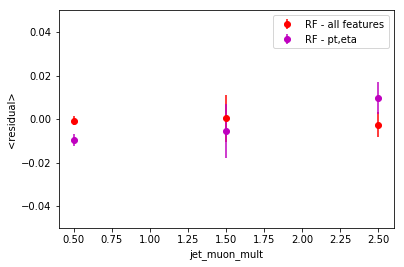

plot_var: jet_photon_mult
low_bin: 0
high_bin: 100
nbins: 100
plot_var: jet_photon_mult
low_bin: 0
high_bin: 100
nbins: 100


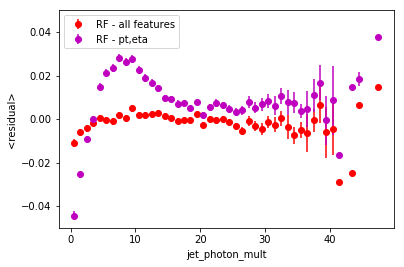

plot_var: jet_neutHad_mult
low_bin: 0
high_bin: 100
nbins: 100
plot_var: jet_neutHad_mult
low_bin: 0
high_bin: 100
nbins: 100


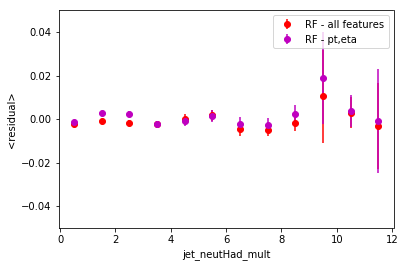

plot_var: jet_charHad_mult
low_bin: 0
high_bin: 100
nbins: 100
plot_var: jet_charHad_mult
low_bin: 0
high_bin: 100
nbins: 100


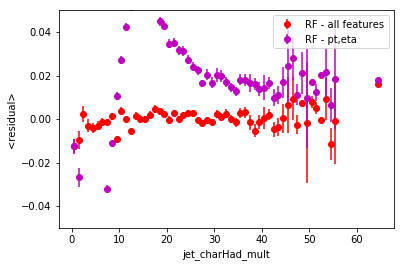

In [7]:
plot_vars=['jet_pt','jet_eta','jet_electron_frac','jet_muon_frac','jet_photon_frac','jet_neutHad_frac','jet_charHad_frac','jet_electron_mult','jet_muon_mult','jet_photon_mult','jet_neutHad_mult','jet_charHad_mult']
var_binning = [(10,1000,90),(-5,5,60),(0,1.5,50),(0,1.5,50),(0,1.5,50),(0,1.5,50),(0,1.5,50),(0,100,100),(0,100,100),(0,100,100),(0,100,100),(0,100,100)]
for v,b in zip(plot_vars,var_binning) :
    residual_profile(v,'residual_rfall','r',*b)
    residual_profile(v,'residual_rfpteta','m',*b)
    #residual_profile(v,'residual','b',*b)
    plt.legend(['RF - all features','RF - pt,eta','Conv. NN'])
    plt.show()